# Logistic Regression

In [371]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions


In [372]:
df = pd.read_csv('D:/Study/UHD/6.Spring 2022/data 4319 final project/Major Project/0. Explore Data/df_workfile.csv')
# df.info()
df.drop(columns=df.columns[0], axis=1, inplace=True)

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


### Build a Machine Learning Logistic regression

In [373]:
benign = df[df.diagnosis == 'B']
malignant = df[df.diagnosis == 'M']

Text(0.5, 1.0, 'Linearly Data')

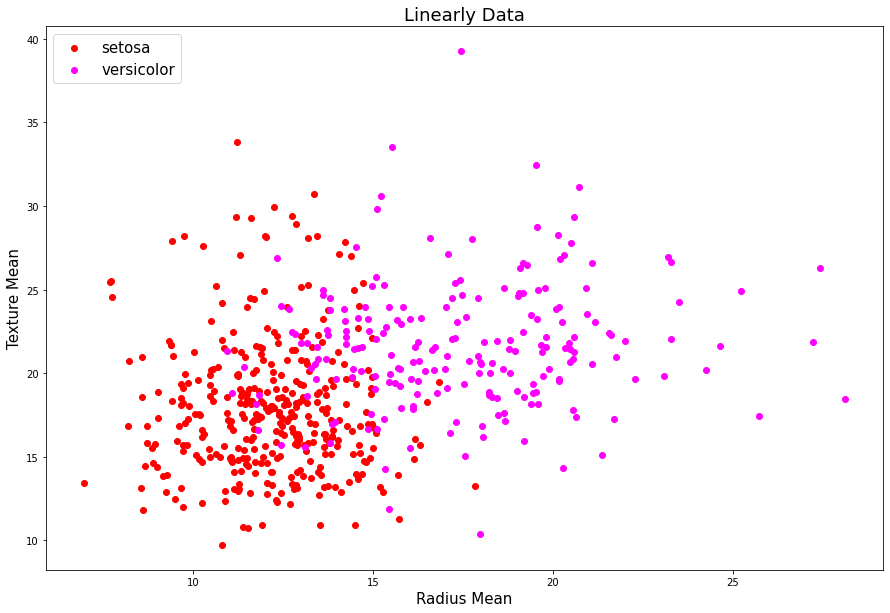

In [374]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15,10))

ax1.scatter(benign.radius_mean, 
            benign.texture_mean, 
            color = "red", 
            label = "setosa")
ax1.scatter(malignant.radius_mean, 
            malignant.texture_mean, 
            color = "magenta", 
            label = "versicolor")
ax1.set_xlabel("Radius Mean", fontsize = 15)
ax1.set_ylabel("Texture Mean", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Linearly Data", fontsize = 18)

In [375]:
X = df['radius_mean'].values
X = X.reshape(-1,1)
# X = df[["radius_mean", "radius_mean"]].values
y = np.where(df.diagnosis == "B", 0, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [376]:
class SingleNeuron(object):
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()


In [377]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

glm_model = SingleNeuron(sigmoid, cross_entropy_loss)
glm_model.train(X_train, y_train, alpha = 0.0001, epochs = 5000)

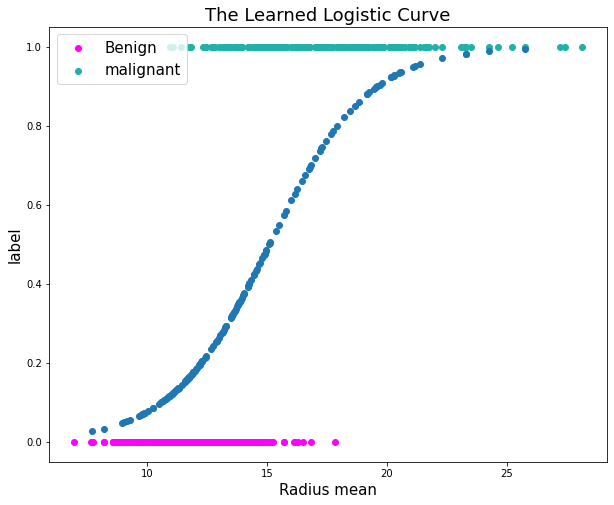

In [378]:
plt.figure(figsize = (10, 8))
plt.scatter(benign.radius_mean, 
            np.zeros(len(benign)), 
            color = "magenta", 
            label = "Benign")
plt.scatter(malignant.radius_mean, 
            np.ones(len(malignant)), 
            color = "lightseagreen", 
            label = "malignant")

# domain = np.linspace(min(X_test), max(X_test), len(X_test))
plt.scatter(X_test, glm_model.predict(X_test))
plt.xlabel("Radius mean", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

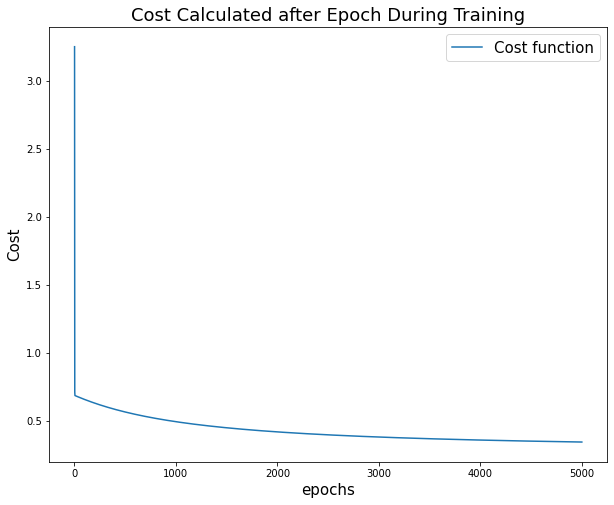

In [379]:
glm_model.plot_cost_function()
plt.show()

In [380]:
classification_error = (np.rint(glm_model.predict(X_test)) != y_test).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y_test)}")

Classification Error = 0.10526315789473684


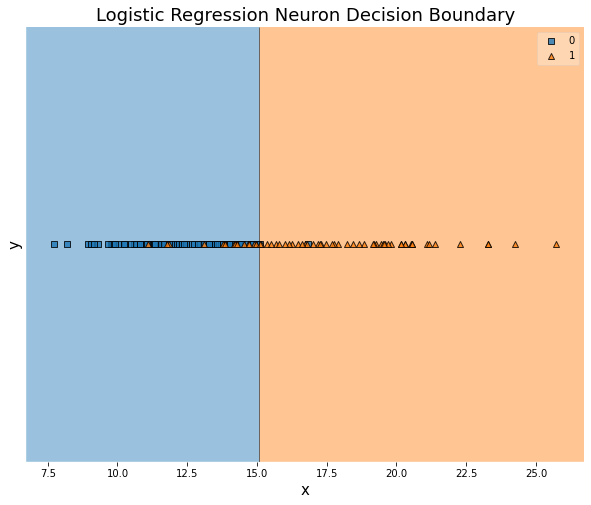

In [381]:
glm_model.plot_decision_boundary(X_test, y_test)
plt.show()

---
## Logistic Single Neuron with multiple Features inputs

In [382]:
X = df[['radius_mean', 'texture_mean']].values
y = np.where(df.diagnosis == "B", 0, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [383]:
glm_model1 = SingleNeuron(sigmoid, cross_entropy_loss)

glm_model1.train(X_train, y_train, alpha = 0.01, epochs = 10_000)


Classification Error = 0.11695906432748537


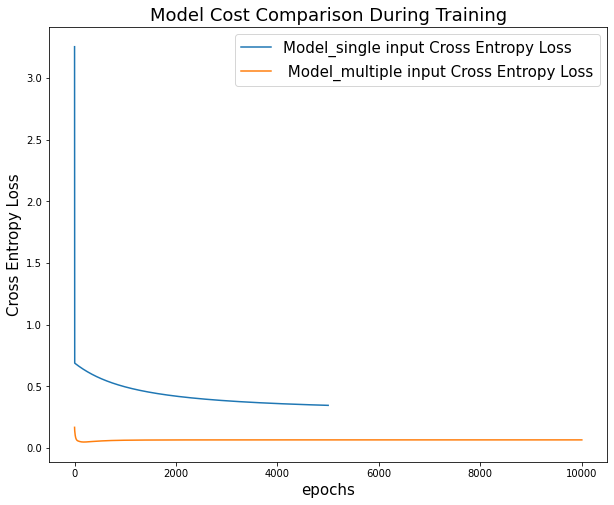

In [384]:
classification_error = (np.rint(glm_model1.predict(X_test)) != y_test).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y_test)}")

plt.figure(figsize = (10, 8))
plt.plot(range(1, len(glm_model.errors_) + 1), 
         glm_model.errors_,
         label = "Model_single input Cross Entropy Loss")
plt.plot(range(1, len(glm_model1.errors_) + 1), 
         glm_model1.errors_,
         label = " Model_multiple input Cross Entropy Loss")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("Cross Entropy Loss", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Model Cost Comparison During Training", fontsize = 18)


plt.show()

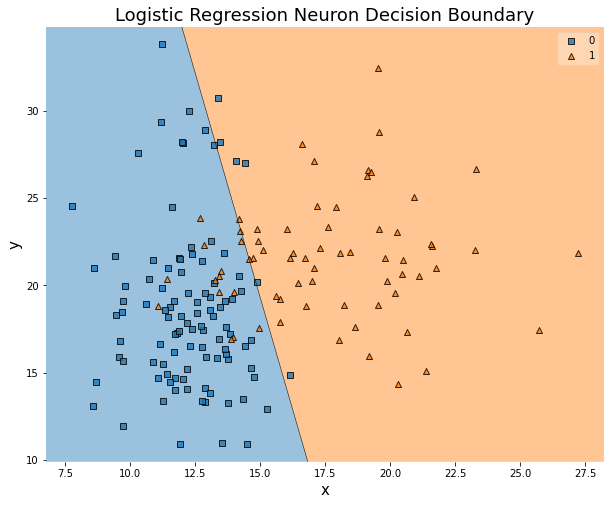

In [385]:
glm_model1.plot_decision_boundary(X_test, y_test)
plt.show()

---
## Logistic Single Neuron - Scikit Learn 

In [386]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

glm_model = LogisticRegression(max_iter = 10_000)
glm_model.fit(X_train, y_train)
predictions = glm_model.predict(X_test)


LogisticRegression()

In [387]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[93 10]
 [12 56]]


              precision    recall  f1-score   support

           0       0.89      0.90      0.89       103
           1       0.85      0.82      0.84        68

    accuracy                           0.87       171
   macro avg       0.87      0.86      0.87       171
weighted avg       0.87      0.87      0.87       171



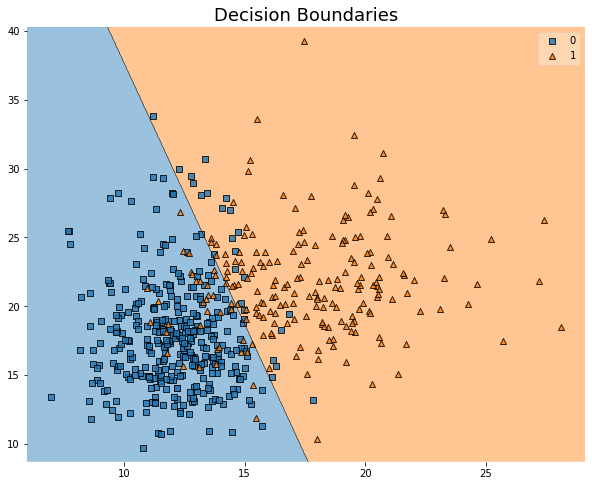

In [388]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = glm_model)
plt.xlabel("", fontsize = 15)
plt.ylabel("", fontsize = 15)
plt.title("Decision Boundaries", fontsize = 18)
plt.show()